/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


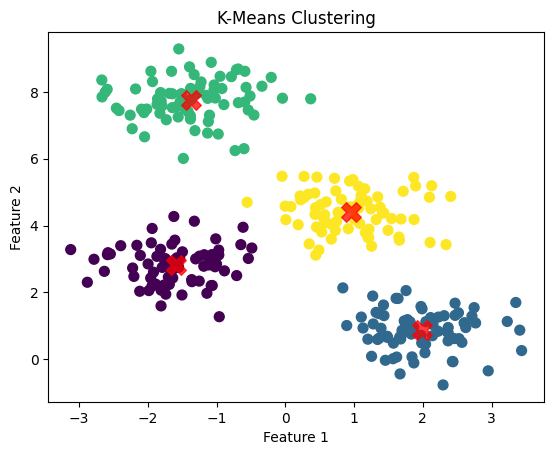

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data (for demonstration)
# You can replace this with your own dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)  # Specify the number of clusters
kmeans.fit(X)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark centroids
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


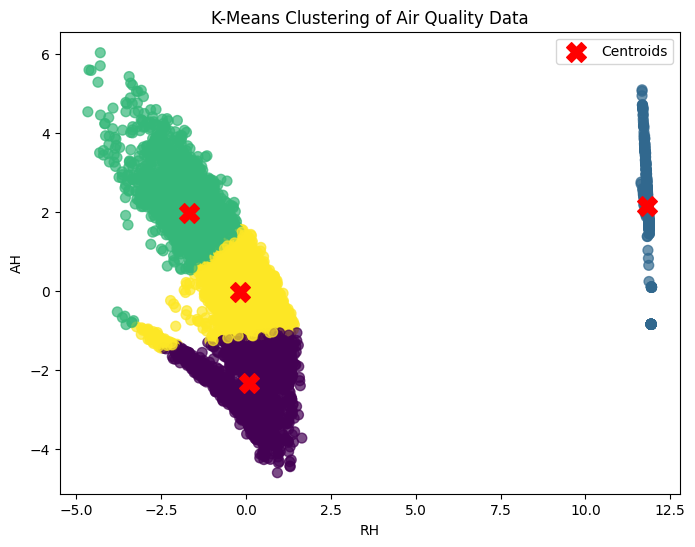

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'AirQuality.csv'  # Update with the correct file path
df = pd.read_csv(file_path, delimiter=';')

# Clean the numeric data (replace commas with periods and convert to numeric)
df_cleaned = df.replace(',', '.', regex=True)
df_cleaned = df_cleaned.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'Date', 'Time'])
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Apply PCA to reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_data)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the PCA-reduced data with K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering of Air Quality Data')
plt.xlabel('RH')
plt.ylabel('AH')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

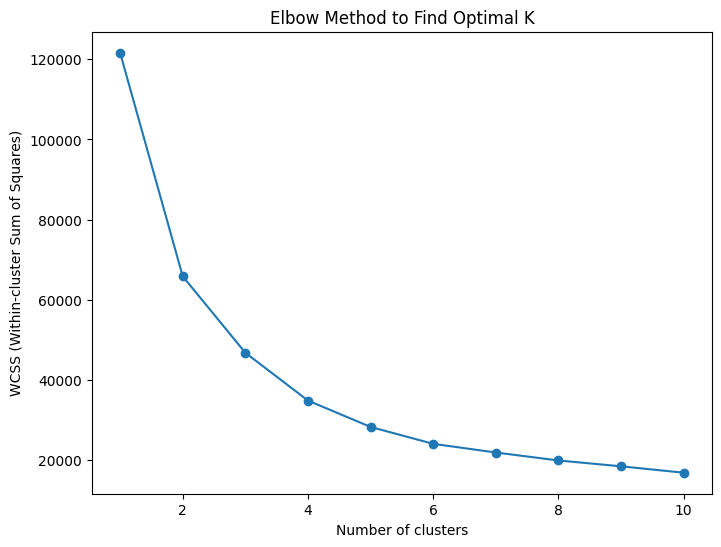

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


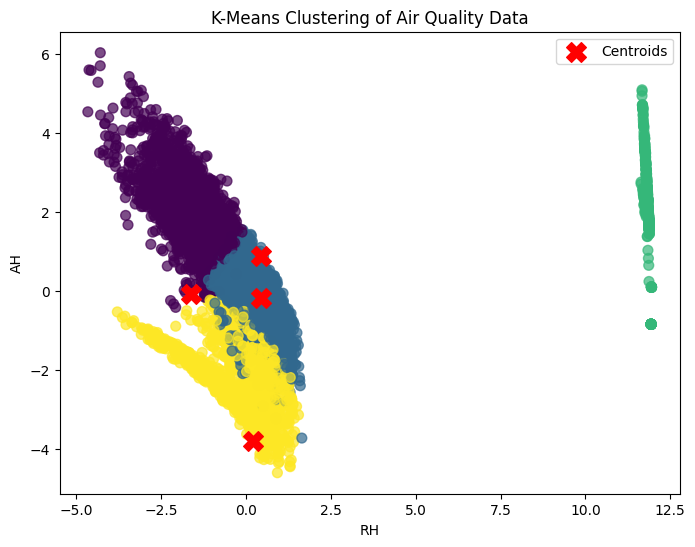

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'AirQuality.csv'  # Update this to your file path
df = pd.read_csv(file_path, delimiter=';')

# Replace commas with periods in the numeric columns and convert to numeric data types
df = df.replace(',', '.', regex=True)

# Drop unnecessary columns (such as 'Unnamed: 15', 'Unnamed: 16', 'Date', and 'Time')
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'Date', 'Time'])

# Convert all remaining columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Finding the optimal number of clusters using the Elbow Method
def find_optimal_k(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plotting the Elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method to Find Optimal K')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS (Within-cluster Sum of Squares)')
    plt.show()

# Call the function to find the optimal K
find_optimal_k(scaled_data)

# Once you find the optimal K from the graph (say it is K=4), you can apply K-Means
optimal_k = 4  # Update this based on the Elbow graph
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Get the cluster labels
labels = kmeans.labels_

# Visualizing the clusters using PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering of Air Quality Data')
plt.xlabel('RH')
plt.ylabel('AH')
plt.legend()
plt.show()
